<a href="https://colab.research.google.com/github/mleyvaz/IO/blob/main/Piladoras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

     |████████████████████████████████| 972kB 5.6MB/s 
     |████████████████████████████████| 14.8MB 304kB/s 
     |████████████████████████████████| 6.5MB 44.7MB/s 


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mleyvaz/IO/main/piladoras.csv')
# summarize shape
print(df.shape)
# show first few rows
print(df.head())
de=df['Producción Lbs']

(11, 4)
                    Piladora   Latitud   Longitud Producción Lbs
0    Piladora Gloria Matilde -1.877144 -79.986313         15,486
1             Piladora Yanco -1.882472 -79.983788             30
2       Piladora Santa Clara -1.835461 -79.978638             30
3      Piladora Katty Nicolk -1.796984 -79.990654             30
4  Piladora Voluntad de Dios -1.794140 -79.993240             30


In [5]:
crs={'init':'epsg:4326'}
geometry=[Point(xy) for xy in zip(df["Longitud"], df["Latitud"])]
geodata=gpd.GeoDataFrame(df,crs=crs, geometry=geometry)
#https://www.linkedin.com/pulse/geopandas-plotting-data-points-map-using-python-r%C3%A9gis-nisengwe/

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


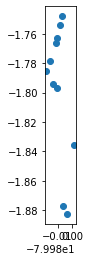

In [6]:
geodata.plot()

In [ ]:
# rwanda_shapefile = gpd.read_file(r'rwanda_shapefile.shp')


In [7]:
 from scipy.spatial.distance import squareform, pdist
 data=df
for i in df["Piladora"]:
    for j in df["Piladora"]:
        row = df[df["Piladora"] == j][["Latitud", "Longitud"]]
        latitude = row["Latitud"].tolist()[0]
        longitude = row["Longitud"].tolist()[0]
        df.loc[df['Piladora'] == i, j] = ((df["Latitud"] - latitude)**2 + (df["Longitud"] - longitude)**2)**0.5

df = df.drop(["Piladora", "Latitud", "Longitud","Producción Lbs"], axis=1)
df.head()


,geometry,Piladora Gloria Matilde,Piladora Yanco,Piladora Santa Clara,Piladora Katty Nicolk,Piladora Voluntad de Dios,Piladora la dorada,Piladora Nacho,Piladora Brito y Es´pinoza,Piladora Mary Joe,Piladora Fatima,Piladora Santa Lucia
0,POINT (-79.98631 -1.87714),0.000000,0.005896,0.042384,0.080277,0.083293,0.092527,0.098887,0.110727,0.114304,0.123390,0.129047
1,POINT (-79.98379 -1.88247),0.005896,0.000000,0.047292,0.085763,0.088836,0.098142,0.104442,0.116187,0.119743,0.128787,0.134413
2,POINT (-79.97864 -1.83546),0.042384,0.047292,0.000000,0.040310,0.043825,0.053628,0.059185,0.070094,0.073506,0.082290,0.087772
3,POINT (-79.99065 -1.79698),0.080277,0.085763,0.040310,0.000000,0.003844,0.013604,0.018895,0.030460,0.034068,0.043258,0.049011
4,POINT (-79.99324 -1.79414),0.083293,0.088836,0.043825,0.003844,0.000000,0.009864,0.015610,0.027672,0.031345,0.040631,0.046445


In [9]:
pip install ortools

In [8]:
"""Capacitated Vehicle Routing Problem with Time Windows (CVRPTW).
"""
from __future__ import print_function
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2

In [ ]:
# Copyright 2010-2018 Google LLC
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# [START program]
"""Capacited Vehicles Routing Problem (CVRP)."""

# [START import]
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
# [END import]


# [START data_model]
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = df.values
    # [START demands_capacities]
    data['demands'] = [30, 30,30,30,30,30,30,30,30,30,30]
    data['vehicle_capacities'] = [10,10]
    # [END demands_capacities]
    data['num_vehicles'] = 4
    data['depot'] = 0
    return data
    # [END data_model]


# [START solution_printer]
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data['demands'][node_index]
            plan_output += ' {0} Load({1}) -> '.format(node_index, route_load)
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += ' {0} Load({1})\n'.format(manager.IndexToNode(index),
                                                 route_load)
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        plan_output += 'Load of the route: {}\n'.format(route_load)
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print('Total distance of all routes: {}m'.format(total_distance))
    print('Total load of all routes: {}'.format(total_load))
    # [END solution_printer]


"""Solve the CVRP problem."""
# Instantiate the data problem.
# [START data]
data = create_data_model()
# [END data]

# Create the routing index manager.
# [START index_manager]
manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                       data['num_vehicles'], data['depot'])
# [END index_manager]

# Create Routing Model.
# [START routing_model]
routing = pywrapcp.RoutingModel(manager)

# [END routing_model]

# Create and register a transit callback.
# [START transit_callback]
def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
# [END transit_callback]

# Define cost of each arc.
# [START arc_cost]
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

# [END arc_cost]

# Add Capacity constraint.
# [START capacity_constraint]
def demand_callback(from_index):
    """Returns the demand of the node."""
    # Convert from routing variable Index to demands NodeIndex.
    from_node = manager.IndexToNode(from_index)
    return data['demands'][from_node]

demand_callback_index = routing.RegisterUnaryTransitCallback(
    demand_callback)
routing.AddDimensionWithVehicleCapacity(
    demand_callback_index,
    0,  # null capacity slack
    data['vehicle_capacities'],  # vehicle maximum capacities
    True,  # start cumul to zero
    'Capacity')
# [END capacity_constraint]

# Setting first solution heuristic.
# [START parameters]
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
search_parameters.local_search_metaheuristic = (
    routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH)
search_parameters.time_limit.FromSeconds(1)
# [END parameters]

# Solve the problem.
# [START solve]
solution = routing.SolveWithParameters(search_parameters)
# [END solve]

# Print solution on console.
# [START print_solution]
if solution:
    print_solution(data, manager, routing, solution)
# [END print_solution]